<a href="https://colab.research.google.com/github/Fuenfgeld/DatamanagementAndArchiving/blob/main/ML-Example/BreastCancerEnhanced.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Zum Beginnen einfach auf Laufzeit clicken und dann 'Alle ausführen' wählen

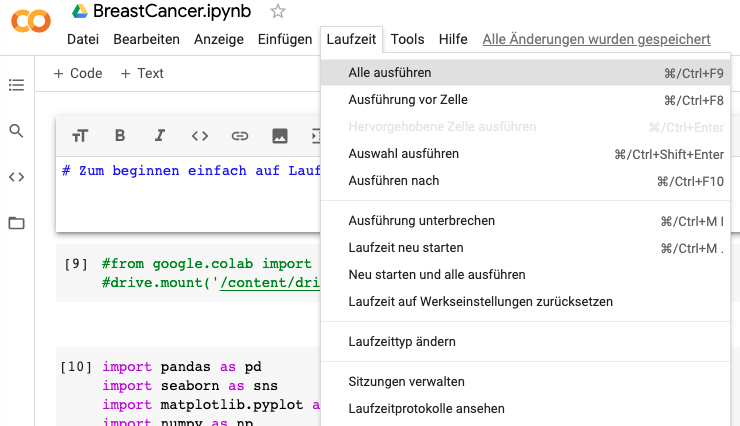

# Delete all variables

In [ ]:
%reset -f 

# Install Packages

In [ ]:
!pip install dtreeviz

# Import Libraries 

In [ ]:
from google.colab import drive
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.datasets import load_breast_cancer

import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import sklearn.metrics
import graphviz

from dtreeviz.trees import dtreeviz 

## Configuration

In [ ]:
%matplotlib inline

# Version Check

In [ ]:
#python Version
import sys
sys.version_info

In [ ]:
pd.__version__

In [ ]:
%pip install pandas

In [ ]:
sns.__version__

In [ ]:
matplotlib.__version__

In [ ]:
np.__version__

In [ ]:
sklearn.__version__

In [ ]:
graphviz.__version__


In [ ]:
%pip freeze

# Load Data

In [ ]:
#drive.mount('/content/drive')

In [ ]:
#cancerDF = pd.read_csv('/content/drive/My Drive/Datamanagement and Archiving/DataAnalysis/BreastCancer.csv')
cancer = load_breast_cancer()
cancerDF = pd.DataFrame(cancer.data, columns=cancer.feature_names)
cancerDF['target'] = pd.Series(cancer.target)

In [ ]:
cancerDF.head()

# Calculate the Checksum of the Data Set

In [ ]:
from pandas.util import hash_pandas_object
cancerDFhashes = hash_pandas_object(cancerDF)

In [ ]:
cancerDFhashes

## Value should be 3026083814099567931

In [ ]:
cancerDFhashes.sum()

## Descriptive Statistics

In [ ]:
cancerDF.describe()

# Plots

In [ ]:
cancerDF['mean radius'].plot(kind='hist', bins=20, figsize=(12,6))

In [ ]:
# Generating the correlating matrix
corr = cancerDF.corr()
plt.figure(figsize=(30, 15))
# Generating the correlation heat-map
sns.heatmap(corr, annot=True)

In [ ]:
list(cancerDF)

In [ ]:
meansDF = cancerDF[['mean radius',
 'mean texture',
 'mean perimeter',
 'mean area',
 'mean smoothness',
 'mean compactness',
 'mean concavity',
 'mean concave points',
 'mean symmetry',
 'mean fractal dimension',
 'target']]

In [ ]:
sns.set_theme(style="ticks")

sns.pairplot(meansDF, hue="target")

# Maschine Learning


In [ ]:
X = cancerDF[['mean radius',
 'mean texture',
 'mean perimeter',
 'mean area',
 'mean smoothness',
 'mean compactness',
 'mean concavity',
 'mean concave points',
 'mean symmetry',
 'mean fractal dimension',
 'radius error',
 'texture error',
 'perimeter error',
 'area error',
 'smoothness error',
 'compactness error',
 'concavity error',
 'concave points error',
 'symmetry error',
 'fractal dimension error',
 'worst radius',
 'worst texture',
 'worst perimeter',
 'worst area',
 'worst smoothness',
 'worst compactness',
 'worst concavity',
 'worst concave points',
 'worst symmetry',
 'worst fractal dimension']]

Y = cancerDF[['target']]

### Split in train and test data is made reproducible by this parameter in train_test_split -> random_state = 0

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 0)

## Decision Tree

In [ ]:
classifier = tree.DecisionTreeClassifier(max_depth=4)  # limit depth of tree
classifier.fit(X_train, Y_train)

In [ ]:
Y_pred = classifier.predict(X_test)

In [ ]:
cm = sklearn.metrics.confusion_matrix(Y_test, Y_pred)
cm

In [ ]:
sklearn.metrics.accuracy_score(Y_test, Y_pred)

In [ ]:
fn=['mean radius',
 'mean texture',
 'mean perimeter',
 'mean area',
 'mean smoothness',
 'mean compactness',
 'mean concavity',
 'mean concave points',
 'mean symmetry',
 'mean fractal dimension',
 'radius error',
 'texture error',
 'perimeter error',
 'area error',
 'smoothness error',
 'compactness error',
 'concavity error',
 'concave points error',
 'symmetry error',
 'fractal dimension error',
 'worst radius',
 'worst texture',
 'worst perimeter',
 'worst area',
 'worst smoothness',
 'worst compactness',
 'worst concavity',
 'worst concave points',
 'worst symmetry',
 'worst fractal dimension']
cn=['benign','malignant']

In [ ]:
dot_data = tree.export_graphviz(classifier, out_file=None, 
                                feature_names = fn, 
                                class_names=cn,
                                filled=True)


graph = graphviz.Source(dot_data, format="png") 
graph

In [ ]:
# remember to load the package

viz = dtreeviz(classifier, X.values, np.transpose(Y.values)[0],
                target_name="target",
                feature_names= fn,
                class_names=["malignant", "benign"], 
                scale=2, 
                orientation='LR') 

viz